## Assignment 4: Obsevational Studies and Applied ML

### Deadline
November 21st,11:59PM

### Important notes

Make sure you push on GitHub your notebook with all the cells already evaluated. Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented. Back up any hypotheses and claims with data, since this is an important aspect of the course. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything.

Use this legendary link to create your repository: [link](https://classroom.github.com/g/YXtsr0QK)

In [109]:
# Put your imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
data_folder = './data/'
animal_folder = './austin-animal-center-shelter-intakes-and-outcomes/'

## Task 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.

Hint: It is useful to add a notion of confidence to your results and explore the data visually. You are allowed to use the SciPy library.

## Task 2: All you need is love… And a dog!

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

**A)** Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. Standardize the values of each feature in the data to have mean 0 and variance 1. The use of external libraries is not permitted in part A, except for numpy and pandas.

**B)** Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.

**C)** Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.

**D)** Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". For the chosen parameters, estimate the performance of your classifier on the test set by presenting the confusion matrix, accuracy, precision, recall, and F1-score with respect to both classes and compare the performance with the performance of the logistic regression. Interpret the results.

You are allowed to use the scikit-learn library to implement your classifiers.

#### Task 2A

In [3]:
# Read csv to load data
aac_intakes_outcomes = pd.read_csv(data_folder + animal_folder + "aac_intakes_outcomes.csv")

# Get list of all columns
list(aac_intakes_outcomes)

# Drop unnecessary columns (columns that aren't listed in the task description above)
drop_cols = ['age_upon_outcome','animal_id_outcome','date_of_birth','outcome_subtype','age_upon_outcome_(days)','age_upon_outcome_age_group','outcome_datetime',
 'outcome_month','outcome_year','outcome_monthyear','outcome_weekday','outcome_hour','outcome_number','dob_year','dob_month','dob_monthyear',
 'age_upon_intake','animal_id_intake','breed','color','found_location','count','age_upon_intake_(days)','age_upon_intake_age_group',
 'intake_datetime','intake_month','intake_monthyear','intake_weekday','intake_hour','time_in_shelter',]
aac_intakes_outcomes = aac_intakes_outcomes.drop(drop_cols, axis=1)

aac_intakes_outcomes.head()

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days
0,Return to Owner,Neutered Male,10.0,Dog,Normal,Stray,Neutered Male,10.0,2017,1.0,0.588194
1,Return to Owner,Neutered Male,7.0,Dog,Normal,Public Assist,Neutered Male,7.0,2014,2.0,1.259722
2,Return to Owner,Neutered Male,6.0,Dog,Normal,Public Assist,Neutered Male,6.0,2014,3.0,1.113889
3,Transfer,Neutered Male,10.0,Dog,Normal,Owner Surrender,Neutered Male,10.0,2014,1.0,4.970139
4,Return to Owner,Neutered Male,16.0,Dog,Injured,Public Assist,Neutered Male,16.0,2013,1.0,0.119444


Categorical features include:
- animal_type
- intake_condition
- intake_type
- sex_upon_intake
- sex_upon_outcome
- outcome_type

In [4]:
# First, convert all categorical columns to 'category' type
cat_list = ["animal_type", "intake_condition", "intake_type", "sex_upon_intake", "sex_upon_outcome", "outcome_type"]
aac_intakes_outcomes[cat_list] = aac_intakes_outcomes[cat_list].apply(lambda x: x.astype('category'))

# Dummy variable encoding for categorical variables
categorical_features = pd.get_dummies(aac_intakes_outcomes[cat_list])

# Drop categorical features in original dataset
aac_intakes_outcomes = aac_intakes_outcomes.drop(cat_list, axis=1)

# Combine dataset with categorical features that are dummy variable encoded
aac_intakes_outcomes = aac_intakes_outcomes.merge(categorical_features, left_index=True, right_index=True)

# Drop outcome types that are not outcome_type_Adoption
aac_intakes_outcomes = aac_intakes_outcomes.drop(["outcome_type_Died", "outcome_type_Disposal", "outcome_type_Euthanasia", "outcome_type_Missing", "outcome_type_Relocate", "outcome_type_Return to Owner", "outcome_type_Rto-Adopt", "outcome_type_Transfer"], axis=1)

In [5]:
# All categorical variables should now be replaced by numerical dummy values
aac_intakes_outcomes.head()

,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Other,intake_condition_Aged,...,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,outcome_type_Adoption
0,10.0,10.0,2017,1.0,0.588194,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
1,7.0,7.0,2014,2.0,1.259722,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,6.0,6.0,2014,3.0,1.113889,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,10.0,10.0,2014,1.0,4.970139,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,16.0,16.0,2013,1.0,0.119444,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [6]:
# Split dataset into test and train set
train = aac_intakes_outcomes.sample(frac=0.8)
test = aac_intakes_outcomes.drop(train.index)

In [7]:
# Get list of feature columns and standardize the train and test datasets to have 0 mean and variance 1
feature_cols = [i for i in list(train.columns) if i != 'outcome_type_Adoption']
train[feature_cols] = (train[feature_cols]-train[feature_cols].mean())/train[feature_cols].std()
test[feature_cols] = (test[feature_cols]-test[feature_cols].mean())/test[feature_cols].std()

In [8]:
# Check test dataset
test.head()

,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Other,intake_condition_Aged,...,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,outcome_type_Adoption
4,4.774624,4.800408,-1.883674,-0.287152,-0.385109,-0.067839,-0.764313,0.868124,-0.24452,-0.062498,...,-0.678478,2.277638,-0.402118,-0.307551,-0.364962,-0.376677,1.355037,-0.684699,-0.307551,0
9,5.464411,5.492088,-0.346717,-0.287152,-0.386560,-0.067839,-0.764313,0.868124,-0.24452,-0.062498,...,-0.678478,-0.439024,2.486677,-0.307551,-0.364962,-0.376677,-0.737941,1.460404,-0.307551,0
15,3.739944,3.762888,-1.883674,-0.287152,-0.145790,-0.067839,-0.764313,0.868124,-0.24452,-0.062498,...,-0.678478,-0.439024,-0.402118,-0.307551,2.739842,-0.376677,-0.737941,-0.684699,-0.307551,0
16,5.809304,5.837928,-1.883674,-0.287152,-0.386267,-0.067839,1.308282,-1.151837,-0.24452,15.999498,...,-0.678478,-0.439024,2.486677,-0.307551,-0.364962,-0.376677,-0.737941,1.460404,-0.307551,0
21,3.395050,3.417048,-1.883674,-0.287152,-0.364301,-0.067839,-0.764313,0.868124,-0.24452,-0.062498,...,-0.678478,2.277638,-0.402118,-0.307551,-0.364962,-0.376677,1.355037,-0.684699,-0.307551,0


In [9]:
# Check train dataset
train.head()

,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,animal_type_Bird,animal_type_Cat,animal_type_Dog,animal_type_Other,intake_condition_Aged,...,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown,sex_upon_outcome_Intact Female,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown,outcome_type_Adoption
48222,-0.652567,-0.726463,0.435458,-0.27606,1.923856,-0.064736,1.301363,-1.149465,-0.242098,-0.063627,...,-0.683464,-0.434773,-0.403777,-0.304610,-0.363389,-0.372104,-0.743096,1.454221,-0.304610,1
50871,0.296808,0.309358,0.435458,-0.27606,-0.386026,-0.064736,-0.768413,-1.149465,4.130489,-0.063627,...,-0.683464,-0.434773,-0.403777,3.282833,-0.363389,-0.372104,-0.743096,-0.687642,3.282833,0
24274,-0.652567,-0.642196,-1.098743,-0.27606,-0.205560,-0.064736,-0.768413,0.869956,-0.242098,-0.063627,...,1.463112,-0.434773,-0.403777,-0.304610,-0.363389,-0.372104,1.345700,-0.687642,-0.304610,1
28711,-0.392788,-0.381821,-0.331642,-0.27606,-0.206495,-0.064736,-0.768413,0.869956,-0.242098,-0.063627,...,-0.683464,-0.434773,-0.403777,-0.304610,-0.363389,-0.372104,-0.743096,1.454221,-0.304610,1
17975,0.641606,0.654948,-1.098743,-0.27606,-0.323896,-0.064736,-0.768413,0.869956,-0.242098,-0.063627,...,-0.683464,-0.434773,2.476575,-0.304610,-0.363389,-0.372104,-0.743096,1.454221,-0.304610,0


In [10]:
# Separate train and test datasets into feature columns and response column

X = train[feature_cols]
Y = train['outcome_type_Adoption']

X_test = test[feature_cols]
Y_test = test['outcome_type_Adoption']

#### Task 2B

In [11]:
# Fit logistic regression
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [12]:
# Get logistic predictions
pred = logistic.predict(X_test)

# Create dataframe that compares predictions with real Y_test values
test_results = pd.DataFrame({'prediction':pred,'Y_test':Y_test})

# Get confusion matrix through comparing pred and Y_test
true_positives = len(test_results[(test_results.prediction == 1) & (test_results.Y_test == 1)])
true_negatives = len(test_results[(test_results.prediction == 0) & (test_results.Y_test == 0)])
false_positives = len(test_results[(test_results.prediction == 1) & (test_results.Y_test == 0)])
false_negatives = len(test_results[(test_results.prediction == 0) & (test_results.Y_test == 1)])

confusion_matrix = np.array([[true_negatives, false_positives], [false_negatives, true_positives]])
confusion_matrix

array([[7655, 1582],
       [1206, 5491]])

In [13]:
def logistic_performance(X, X_test, Y_test, threshold, print_yes=True):
    #get predicted values
    pred = np.where(logistic.predict_proba(X_test)[:,1] > threshold, 1, 0)
    test_results = pd.DataFrame({'prediction':pred,'Y_test':Y_test})
    
    #create confusion matrix values
    true_positives = len(test_results[(test_results.prediction == 1) & (test_results.Y_test == 1)])
    true_negatives = len(test_results[(test_results.prediction == 0) & (test_results.Y_test == 0)])
    false_positives = len(test_results[(test_results.prediction == 1) & (test_results.Y_test == 0)])
    false_negatives = len(test_results[(test_results.prediction == 0) & (test_results.Y_test == 1)])

    #calculate accuracy
    accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)
    
    #calculate precision while considering possibility of dividing by 0
    if true_positives + false_positives == 0: precision_pos = 0
    else: precision_pos = true_positives / (true_positives + false_positives)
    if true_negatives + false_negatives == 0: precision_neg = 0
    else: precision_neg = true_negatives / (true_negatives + false_negatives)
    
    #calculate recall
    if true_positives + false_negatives == 0: recall_pos = 0
    else: recall_pos = true_positives / (true_positives + false_negatives)
    if true_negatives + false_positives == 0: recall_neg = 0
    else: recall_neg = true_negatives / (true_negatives + false_positives)
    
    #calculate f1_score
    if recall_pos + precision_pos == 0: f1_score_pos = 0
    else: f1_score_pos = 2 * (recall_pos * precision_pos) / (recall_pos + precision_pos)
    if recall_neg + precision_neg == 0: f1_score_neg = 0
    else: f1_score_neg = 2 * (recall_neg * precision_neg) / (recall_neg + precision_neg)
    
    if print_yes == True:
        print("accuracy: ", accuracy)
        print("precision (+): ", precision_pos)
        print("precision (-): ", precision_neg)
        print("recall (+): ", recall_pos)
        print("recall (-): ", recall_neg)
        print("f1_score (+): ", f1_score_pos)
        print("f1_score (-): ", f1_score_neg)        
        
    return accuracy, precision_pos, precision_neg, recall_pos, recall_neg, f1_score_pos, f1_score_neg

In [14]:
logistic_performance(X, X_test, Y_test, 0.5)

accuracy:  0.8250282414961717
precision (+):  0.7763325321645695
precision (-):  0.8638979799119738
recall (+):  0.8199193668806929
recall (-):  0.8287322723828082
f1_score (+):  0.7975308641975309
f1_score (-):  0.8459498287103547


(0.8250282414961717,
 0.7763325321645695,
 0.8638979799119738,
 0.8199193668806929,
 0.8287322723828082,
 0.7975308641975309,
 0.8459498287103547)

In [15]:
#Testing threshold range from [0,1]
accuracy_list = []
precision_pos_list = []
precision_neg_list = []
recall_pos_list = []
recall_neg_list = []
f1_score_pos_list = []
f1_score_neg_list = []

#Get thresholds from 0 - 1
thresholds = np.arange(0, 1.1, 0.1)

for i in thresholds:
    accuracy, precision_pos, precision_neg, recall_pos, recall_neg, f1_score_pos, f1_score_neg = logistic_performance(X, X_test, Y_test, i, print_yes=False)
    accuracy_list.append(accuracy)
    precision_pos_list.append(precision_pos)
    precision_neg_list.append(precision_neg)
    recall_pos_list.append(recall_pos)
    recall_neg_list.append(recall_neg)
    f1_score_pos_list.append(f1_score_pos)
    f1_score_neg_list.append(f1_score_neg)

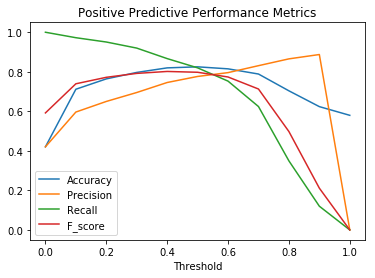

In [16]:
#plot positive graphs
plt.plot(thresholds, accuracy_list, thresholds, precision_pos_list, thresholds, recall_pos_list, thresholds, f1_score_pos_list)
plt.xlabel("Threshold")
plt.legend(["Accuracy", 'Precision', 'Recall', 'F_score'])
plt.title('Positive Predictive Performance Metrics')

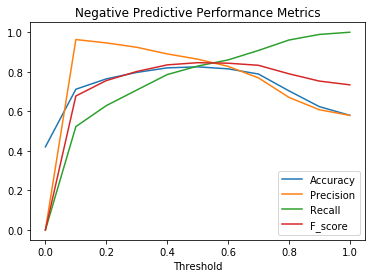

In [17]:
#plot negative graphs
plt.plot(thresholds, accuracy_list, thresholds, precision_neg_list, thresholds, recall_neg_list, thresholds, f1_score_neg_list)
plt.xlabel("Threshold")
plt.legend(["Accuracy", 'Precision', 'Recall', 'F_score'])
plt.title('Negative Predictive Performance Metrics')

The goal of the shelter should be to minimize the number of animals that are unnecessarily put to sleep. In other words, the goal is to minimize false negatives which would prevent killing animals that would have otherwise been adopted. In this case, negative precision is the most important metric and class when choosing a threshold. The metric negative precision compares the number of accurate unadopted predictions to the total number of unadopted predictions made -- the shelter should maximize this number in order to reduce the chance of unnecessary animals being put to sleep. Based on the graph above, a threshold of ~0.1 would be ideal in achieving the highest negative precision.

#### Task 2C

In [73]:
# At each iteration, the function calculates (using 5-fold cross validation), the accuracy of the training dataset
# minus 1 column and stores this in a dictionary. At the end of each iteration, the dropped column that corresponds
# to the subset with the highest accuracy is dropped from the feature columns. The iteration continues until there
# are only k features left. Finally, it returns k, list of remaining columns, and accuracy of the final data.

def backward_feature_selection(x_train, y_train, k):
    num_features = x_train.shape[1]
    while num_features > k:
        accuracies = {}
        for column in x_train:
            data_without_col = x_train.loc[:, x_train.columns != column]
            accuracy = cross_val_score(logistic, data_without_col, y_train, cv=5, scoring="accuracy").mean()
            accuracies[column] = accuracy
        min_accuracy_col = max(accuracies, key=accuracies.get)
        x_train = x_train.drop(min_accuracy_col, axis=1)
        num_features -= 1
    sub_accuracy = cross_val_score(logistic, x_train, y_train, cv=5, scoring="accuracy").mean()
    return k, list(x_train), sub_accuracy

In [74]:
# Get the remaining columns and accuracy for each k value, and store them in a list.

k_list = [1, 5, 10, 15, 20, 25, 30]
col_list = []
accuracy_list = []

for k in k_list:
    num, cols, accuracy = backward_feature_selection(X, Y, k)
    col_list.append(cols)
    accuracy_list.append(accuracy)


{'k': [1, 5, 10, 15, 20, 25, 30],
 'columns': [['sex_upon_outcome_Intact Male'],
  ['time_in_shelter_days',
   'sex_upon_intake_Intact Female',
   'sex_upon_intake_Intact Male',
   'sex_upon_outcome_Intact Male',
   'sex_upon_outcome_Spayed Female'],
  ['age_upon_outcome_(years)',
   'intake_year',
   'time_in_shelter_days',
   'intake_type_Owner Surrender',
   'intake_type_Stray',
   'sex_upon_intake_Intact Female',
   'sex_upon_intake_Intact Male',
   'sex_upon_intake_Neutered Male',
   'sex_upon_outcome_Intact Male',
   'sex_upon_outcome_Spayed Female'],
  ['age_upon_outcome_(years)',
   'intake_year',
   'intake_number',
   'time_in_shelter_days',
   'intake_condition_Feral',
   'intake_condition_Injured',
   'intake_condition_Nursing',
   'intake_condition_Sick',
   'intake_type_Owner Surrender',
   'intake_type_Stray',
   'sex_upon_intake_Intact Female',
   'sex_upon_intake_Intact Male',
   'sex_upon_intake_Neutered Male',
   'sex_upon_outcome_Intact Male',
   'sex_upon_outcome_S

In [77]:
# Convert the lists into a dataframe for easier visualization
feature_subsets = pd.DataFrame({'k' : k_list,
                   'columns' : col_list,
                   'accuracy' : accuracy_list})

feature_subsets

,k,columns,accuracy
0,1,[sex_upon_outcome_Intact Male],0.578007
1,5,"[time_in_shelter_days, sex_upon_intake_Intact ...",0.799774
2,10,"[age_upon_outcome_(years), intake_year, time_i...",0.820154
3,15,"[age_upon_outcome_(years), intake_year, intake...",0.821817
4,20,"[age_upon_outcome_(years), intake_year, intake...",0.821959
5,25,"[age_upon_outcome_(years), intake_year, intake...",0.821739
6,30,"[age_upon_outcome_(years), intake_year, intake...",0.821488


A k value of **20** produces the highest accuracy level at 0.821959.

In [88]:
feature_subsets[feature_subsets['k'] ==20].iloc[0]['columns']

['age_upon_outcome_(years)',
 'intake_year',
 'intake_number',
 'time_in_shelter_days',
 'animal_type_Other',
 'intake_condition_Feral',
 'intake_condition_Injured',
 'intake_condition_Nursing',
 'intake_condition_Other',
 'intake_condition_Sick',
 'intake_type_Owner Surrender',
 'intake_type_Public Assist',
 'intake_type_Stray',
 'sex_upon_intake_Intact Female',
 'sex_upon_intake_Intact Male',
 'sex_upon_intake_Neutered Male',
 'sex_upon_intake_Unknown',
 'sex_upon_outcome_Intact Male',
 'sex_upon_outcome_Spayed Female',
 'sex_upon_outcome_Unknown']

It makes sense that the age, sex, and health condition of the animal are strongly correlated to whether or not it is adopted. Most likely, people are more willing to adopt younger, healthier and spayed/neutered animals. Intake type can also have an impact, because one can argue that owner surrender animals could potentially be more healthier than stray animals who had to survive in the wild in the past. Also, a high intake number could mean that there is something wrong with the animal, which is why the adoption agency had to continuously intake it back--this may correlate to a lower chance of adoption. Time spent in shelters may also have a strong correlation with adoption--if an animal has stayed many years in a shelter and they still has not been adopted, it may indicate a lower probability of adoption as a final outcome. Finally, animal_type_Other could be animals that are not as popular, or typically not pet-friendly, which may also result in a lower adoption probability.

#### Task 2D

In [116]:
# Grid-search for a n_estimators and max_depth combination that produce the highest accuracy using cross-validation
# Note: we can also search for the best combination for precision and recall; however we chose to use accuracy
# because it provided the most general and easiest to understand measurement for measuring classifier performance.

tuned_parameters = [{'n_estimators': [1, 10, 50, 100], 'max_depth': [1, 10, 50, 100],}]
clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf.fit(X, Y)

print("Grid Scores: \n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("Accuracy: %0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
print("\nOptimal parameter combination:", )
print(clf.best_params_)

Grid Scores: 

Accuracy: 0.613 (+/-0.072) for {'max_depth': 1, 'n_estimators': 1}
Accuracy: 0.619 (+/-0.106) for {'max_depth': 1, 'n_estimators': 10}
Accuracy: 0.665 (+/-0.084) for {'max_depth': 1, 'n_estimators': 50}
Accuracy: 0.623 (+/-0.096) for {'max_depth': 1, 'n_estimators': 100}
Accuracy: 0.819 (+/-0.031) for {'max_depth': 10, 'n_estimators': 1}
Accuracy: 0.847 (+/-0.006) for {'max_depth': 10, 'n_estimators': 10}
Accuracy: 0.850 (+/-0.004) for {'max_depth': 10, 'n_estimators': 50}
Accuracy: 0.850 (+/-0.005) for {'max_depth': 10, 'n_estimators': 100}
Accuracy: 0.807 (+/-0.003) for {'max_depth': 50, 'n_estimators': 1}
Accuracy: 0.827 (+/-0.002) for {'max_depth': 50, 'n_estimators': 10}
Accuracy: 0.831 (+/-0.002) for {'max_depth': 50, 'n_estimators': 50}
Accuracy: 0.832 (+/-0.002) for {'max_depth': 50, 'n_estimators': 100}
Accuracy: 0.807 (+/-0.003) for {'max_depth': 100, 'n_estimators': 1}
Accuracy: 0.825 (+/-0.002) for {'max_depth': 100, 'n_estimators': 10}
Accuracy: 0.830 (+/-0.

Based on the above results, we will use a parameter combination of max_depth = 10 and n_estimators = 50

In [117]:
randomforest = RandomForestClassifier(n_estimators = 50, max_depth = 10)
randomforest.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [123]:
# Get Confusion Matrix for Random Forest

# Get random forest predictions
pred_rf = randomforest.predict(X_test)

# Create dataframe that compares predictions with real Y_test values
test_results_rf = pd.DataFrame({'prediction':pred_rf,'Y_test':Y_test})

# Get confusion matrix through comparing predictions and Y_test
true_positives_rf = len(test_results_rf[(test_results_rf.prediction == 1) & (test_results_rf.Y_test == 1)])
true_negatives_rf = len(test_results_rf[(test_results_rf.prediction == 0) & (test_results_rf.Y_test == 0)])
false_positives_rf = len(test_results_rf[(test_results_rf.prediction == 1) & (test_results_rf.Y_test == 0)])
false_negatives_rf = len(test_results_rf[(test_results_rf.prediction == 0) & (test_results_rf.Y_test == 1)])

# Get Confusion Matrix for Logistic Regression

# Get logistic predictions
pred = logistic.predict(X_test)

# Create dataframe that compares predictions with real Y_test values
test_results = pd.DataFrame({'prediction':pred,'Y_test':Y_test})

# Get confusion matrix through comparing pred and Y_test
true_positives = len(test_results[(test_results.prediction == 1) & (test_results.Y_test == 1)])
true_negatives = len(test_results[(test_results.prediction == 0) & (test_results.Y_test == 0)])
false_positives = len(test_results[(test_results.prediction == 1) & (test_results.Y_test == 0)])
false_negatives = len(test_results[(test_results.prediction == 0) & (test_results.Y_test == 1)])

In [124]:
confusion_matrix_rf = np.array([[true_negatives_rf, false_positives_rf], [false_negatives_rf, true_positives_rf]])
print("Confusion Matrix of Random Forest Classifier:\n", confusion_matrix_rf)
print("\nConfusion Matrix of Logistic Regression:\n", confusion_matrix)

Confusion Matrix of Random Forest Classifier:
 [[7624 1613]
 [ 789 5908]]

Confusion Matrix of Logistic Regression:
 [[7655 1582]
 [1206 5491]]


In [126]:
#calculate accuracy
accuracy_rf = (true_positives_rf + true_negatives_rf) / (true_positives_rf + true_negatives_rf + false_positives_rf + false_negatives_rf)
accuracy = (true_positives + true_negatives) / (true_positives + true_negatives + false_positives + false_negatives)

print("Random Forest Accuracy:", accuracy_rf)
print("Logistic Accuracy:", accuracy)

#calculate precision
precision_pos_rf = true_positives_rf / (true_positives_rf + false_positives_rf)
precision_neg_rf = true_negatives_rf / (true_negatives_rf + false_negatives_rf)
precision_pos = true_positives / (true_positives + false_positives)
precision_neg = true_negatives / (true_negatives + false_negatives)

print()
print("Random Forest Precision (+):", precision_pos_rf)
print("Logistic Precision (+):", precision_pos)
print("Random Forest Precision (-)", precision_neg_rf)
print("Logistic Precision (-):", precision_neg)
    
#calculate recall
recall_pos_rf = true_positives_rf / (true_positives_rf + false_negatives_rf)
recall_neg_rf = true_negatives_rf / (true_negatives_rf + false_positives_rf)
recall_pos = true_positives / (true_positives + false_negatives)
recall_neg = true_negatives / (true_negatives + false_positives)

print()
print("Random Forest Recall (+):", recall_pos_rf)
print("Logistic Recall (+):", recall_pos)
print("Random Forest Recall (-)", recall_neg_rf)
print("Logistic Recall (-):", recall_neg)

#calculate f1_score
f1_score_pos_rf = 2 * (recall_pos_rf * precision_pos_rf) / (recall_pos_rf + precision_pos_rf)
f1_score_neg_rf = 2 * (recall_neg_rf * precision_neg_rf) / (recall_neg_rf + precision_neg_rf)
f1_score_pos = 2 * (recall_pos * precision_pos) / (recall_pos + precision_pos)
f1_score_neg = 2 * (recall_neg * precision_neg) / (recall_neg + precision_neg)

print()
print("Random Forest F1 Score (+):", f1_score_pos_rf)
print("Logistic F1 Score (+):", f1_score_pos)
print("Random Forest F1 Score (-)", f1_score_neg_rf)
print("Logistic F1 Score (-):", f1_score_neg)  

Random Forest Accuracy: 0.8492531693234593
Logistic Accuracy: 0.8250282414961717

Random Forest Precision (+): 0.7855338385852945
Logistic Precision (+): 0.7763325321645695
Random Forest Precision (-) 0.9062165695946749
Logistic Precision (-): 0.8638979799119738

Random Forest Recall (+): 0.8821860534567717
Logistic Recall (+): 0.8199193668806929
Random Forest Recall (-) 0.8253762043953664
Logistic Recall (-): 0.8287322723828082

Random Forest F1 Score (+): 0.8310592207061471
Logistic F1 Score (+): 0.7975308641975309
Random Forest F1 Score (-) 0.8639093484419262
Logistic F1 Score (-): 0.8459498287103547


Based on the statistics above, a random forest classification appears better for this case because it not only produces a higher accuracy level, but it also has a higher negative precision and a higher positive recall. Both negative precision and positive recall are correlated to minimizing false negatives, which is important in this case because we don't want to mislabel and put to sleep an animal that might be adopted in the future. This is also reflected in the absolute value of false negatives in the confusion matrix for both classifiers--random forest has 789 false negatives, while logistic regression has 1206 false negatives. Hence for the purpose of the shelter, random forest is the better classifier.